## Seaborn

### What are the most popular stations in the city? 
### What are the busiest months and is there a weather component at play?
### What are the most popular trips between stations? 
### Are the existing stations evenly distributed?


The first question - “What are the most popular stations in the city?” - has an easy answer - we simply need a list of the 10 or 20 most popular start stations in the city. As this variable is a categorical one, a **bar chart** would suit our purposes best. A bar chart is one of the most common forms of visualizations because it’s very straightforward to interpret from anyone regardless of their background. 

Onto the second question - regarding when the most trips are taken and how this is connected to weather - we’d need a yearly overview of the trips month by month. Time series are best plotted on a **line chart**, hence we could plot the sum of the bike trips for each month as one line and combine it with the average temperature monthly as a second line on the plot. This will also show us whether there’s a relationship between temperature and bike usage. This is important because right now, the business strategy development isn’t clear whether the demand problem is a seasonal one or not. 


In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [9]:
%%capture
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('Data/output/newyork_data.csv')

In [11]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

(array([0, 1]), [Text(0, 0, 'member'), Text(1, 0, 'casual')])

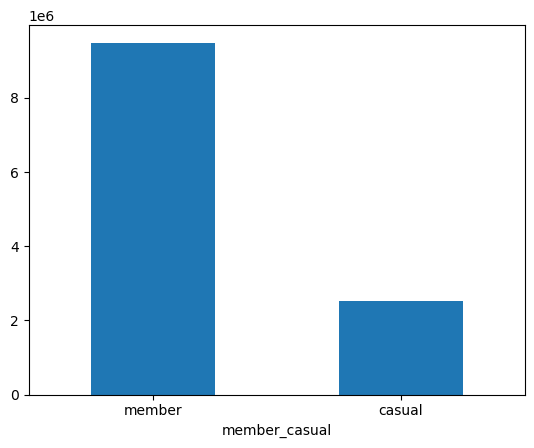

In [12]:
df['member_casual'].value_counts().plot(kind = 'bar')
# Set x-axis labels with rotation 0
plt.xticks(rotation=0)

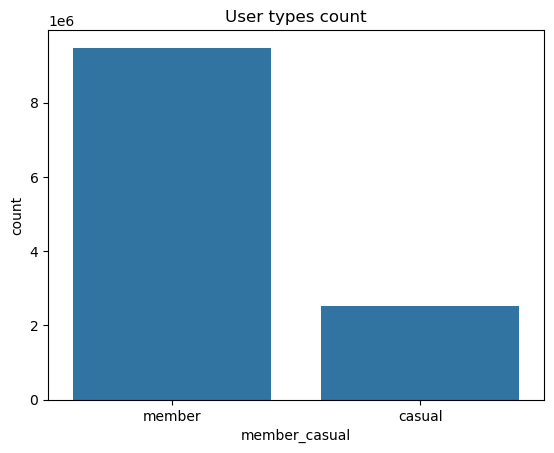

In [13]:
sns.countplot(data = df, x = 'member_casual')
plt.title("User types count")
plt.show()

### Types of plots

In [15]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

## Types of seaborn visualizations

#### Bar Chart

In [18]:
df['value'] = 1

In [19]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [20]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,9609
1,1 Ave & E 16 St,27537
2,1 Ave & E 18 St,29602
3,1 Ave & E 30 St,17581
4,1 Ave & E 39 St,22517
...,...,...
1756,Wyckoff Ave & Gates Ave,7597
1757,Wyckoff St & 3 Ave,154
1758,Wyckoff St & Nevins St,4304
1759,Wythe Ave & Metropolitan Ave,27490


In [21]:
top20 = df_t.nlargest(20, 'value')

In [22]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,52629
8,1 Ave & E 68 St,48603
495,Broadway & W 58 St,45270
1718,West St & Chambers St,44562
286,6 Ave & W 33 St,41279
1511,University Pl & E 14 St,39656
788,E 33 St & 1 Ave,38674
463,Broadway & E 21 St,38310
461,Broadway & E 14 St,38197
485,Broadway & W 25 St,37979


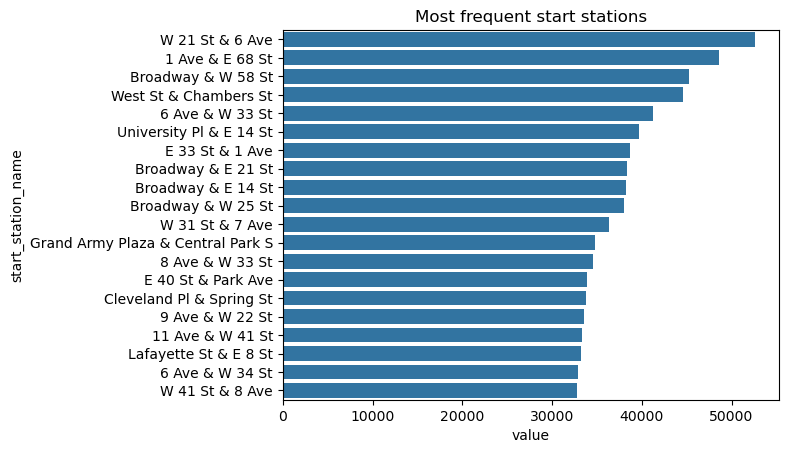

In [23]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

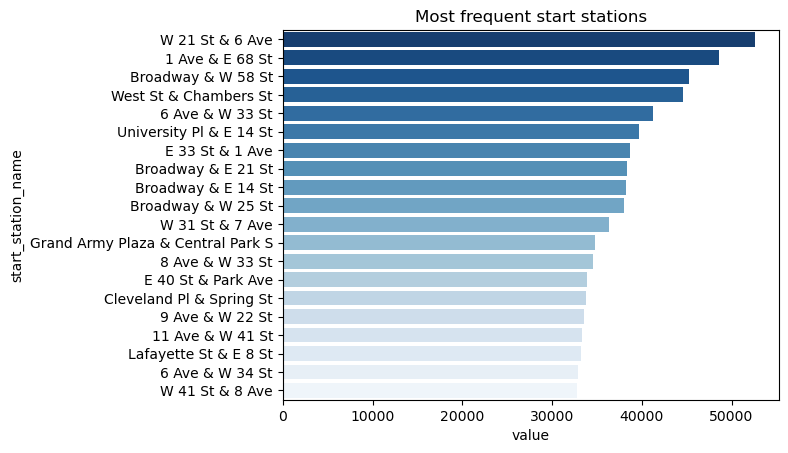

In [24]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

### Line Plot 

In [26]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [27]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [28]:
df_group.head()

,date,ride_id
0,2021-01-30,1
1,2021-02-15,1
2,2021-04-30,1
3,2021-07-10,1
4,2021-07-22,1


In [29]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          12000000
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (19905, 19)
Shape of January 2nd is (41920, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')


In [30]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

In [31]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,left_only,1,1,both
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,left_only,1,1,both
2021-04-30,8AFBCFEE21703C2D,classic_bike,2021-04-30 16:56:21.003,2022-03-08 17:18:57.580,Bedford Ave & Nassau Ave,5550.05,Lorimer St & Broadway,4965.01,40.723117,-73.952123,40.704118,-73.948186,casual,NaN,left_only,1,1,both
2021-07-10,BA13AC6CD2C65E88,classic_bike,2021-07-10 14:53:21.751,2022-09-09 21:21:15.210,E Tremont Ave & E 176 St,8356.02,Popham Ave & W 174 St,8348.02,40.847798,-73.901883,40.847746,-73.922079,casual,NaN,left_only,1,1,both
2021-07-22,2F298092D779509A,classic_bike,2021-07-22 11:49:56.126,2022-01-21 13:15:37.645,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,NaN,left_only,1,1,both


In [32]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

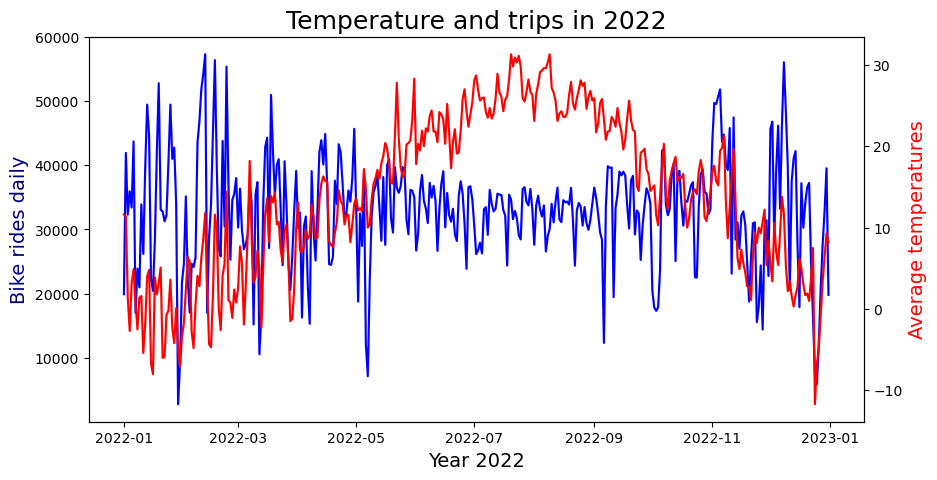

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df_temp' has a datetime index or a date column
df_temp = df_temp[df_temp.index >= "2022-01-01"]  # Filter data from 2022 onwards

fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides
sns.lineplot(data=df_temp['bike_rides_daily'], color="b", ax=ax)
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)

# Second y-axis for temperature
ax2 = ax.twinx()
sns.lineplot(data=df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

plt.title("Temperature and trips in 2022", fontsize=18)
plt.show()


### Box Plots

In [35]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily               int64
merge_flag                  category
dtype: object

In [36]:
df['rideable_type']

0           electric_bike
1            classic_bike
2            classic_bike
3            classic_bike
4            classic_bike
                ...      
11999995    electric_bike
11999996     classic_bike
11999997    electric_bike
11999998    electric_bike
11999999     classic_bike
Name: rideable_type, Length: 12000000, dtype: object

In [37]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

In [38]:
print(df["bike_rides_daily"].unique())


[    1     2     3     4     9   575 19905 41920 32309 35935 33411 43709
 16991 23905 20986 33897 26189 39586 49440 44687 22302 20425 28397 41866
 52767 33065 32800 31264 32239 40441 40975 42757 34039  2779  9263 21811
 24631 35153 22159 17062 24652 24150 25647 43469 46794 51870 54163 57278
 17008 28731 33826 44840 56369 39420 26948 25805 43769 30475 55351 37022
 25280 34571 35525 37995 30295 36366 29837 26918 27779 29266 36895 34123
 15202 35485 37370 10556 16821 34292 42810 44297 27096 50939 42066 35354
 40020 40940 33118 24419 40622 33670 24781 20586 26001 33036 39103 30177
 32627 16274 30434 32017 21240 15318 39083 29743 25148 33240 42077 43900
 40113 44870 37086 24587 24478 25767 37603 33934 43266 41933 37019 31458
 32655 36068 34341 37988 45671 33385 18765 32498 27429 38419 12153  7142
 22093 32102 35819 36819 38368 33482 28220 38165 27596 40025 40952 31708
 29515 39710 36477 35701 36720 39734 39032 31499 29240 36144 36047 35014
 26699 29385 36084 38474 34426 33256 30992 37266 34

In [39]:
print(df["rideable_type"].unique())

['electric_bike' 'classic_bike']


### Variable Selection

#### I chose the correlation variables as rideable_type ( Classic or ELectric Bike) and the bike_rides_daily (Count). This correlation can give us an estimate of which vehicle type our customers mostly prefer using. Further down the analysis, I also include the type of the user (member vs casual). With the outcome of this analysis, we can better understand the preference of our loyal member customers, and we can come up with a special campaign to honor their loyalty to us.

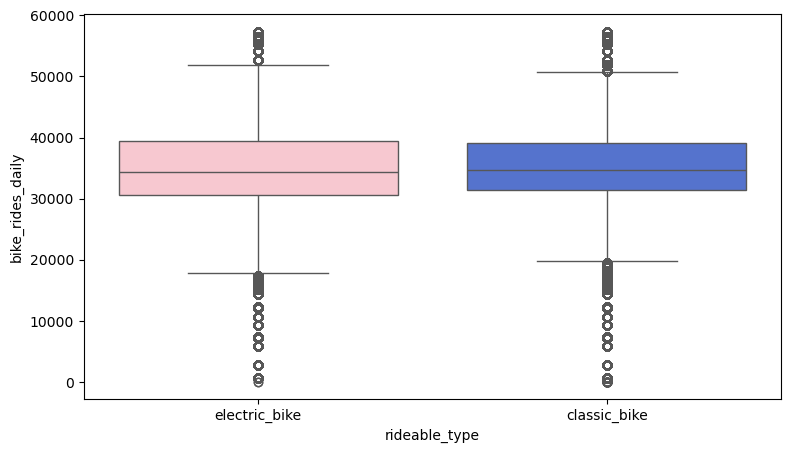

In [42]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'rideable_type', y = 'bike_rides_daily', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'pink'})
plt.show()

### Violin Plot 

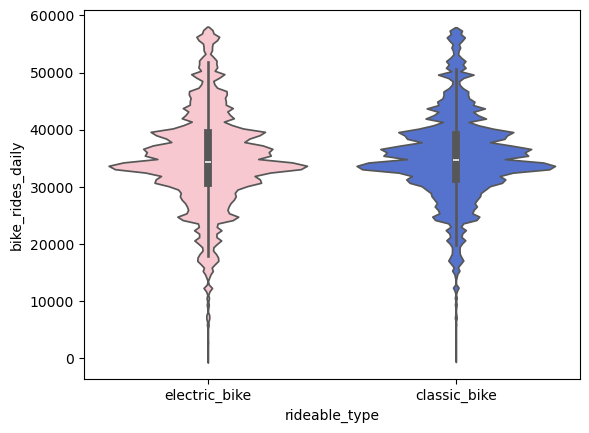

In [44]:
sns.violinplot(x = 'rideable_type', y = 'bike_rides_daily', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'pink'})
plt.show()

### Strip plot

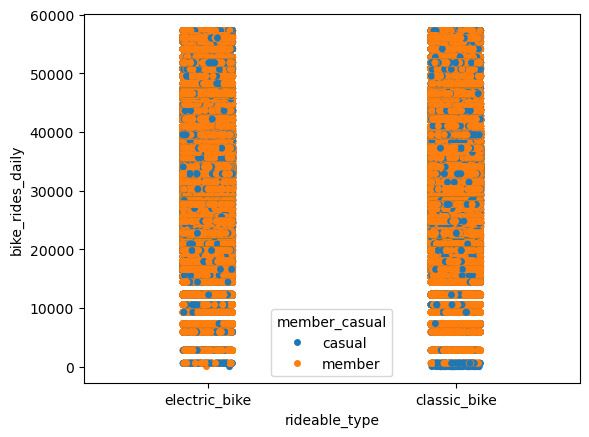

In [46]:
sns.stripplot(x = 'rideable_type', y = 'bike_rides_daily', data = df, hue = 'member_casual')
plt.show()

In [47]:
sns.reset_orig()

### FacetGrids

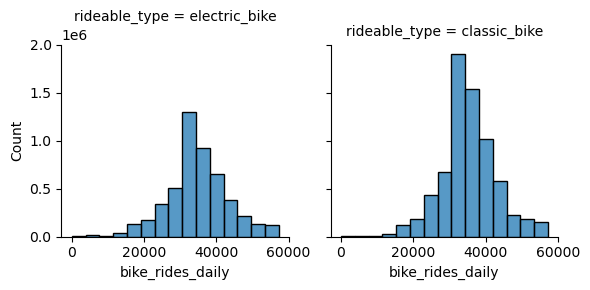

In [49]:
grid = sns.FacetGrid(df, col = "rideable_type")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)
plt.show()

### By the help of this facetgrids, we are able to differenciate 2 categorical variable with its performance. Here, in this facetgrid, we can see clearly which type of bike (electic vs classic) is more prefered in daily bike rides by our users.

### Histogram

In [52]:
sns.set_style('darkgrid')

In [53]:
%matplotlib inline

<Figure size 900x500 with 0 Axes>

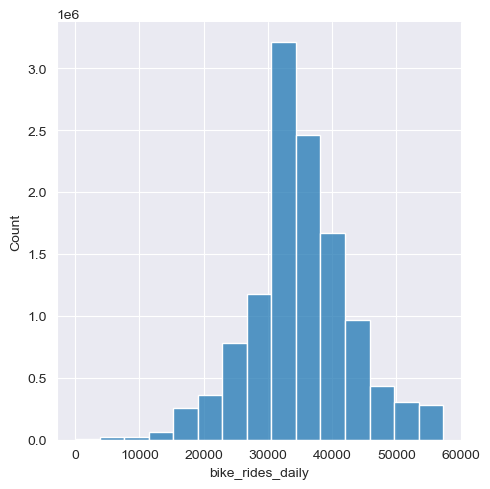

In [54]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [55]:
sns.reset_orig()

<Figure size 900x500 with 0 Axes>

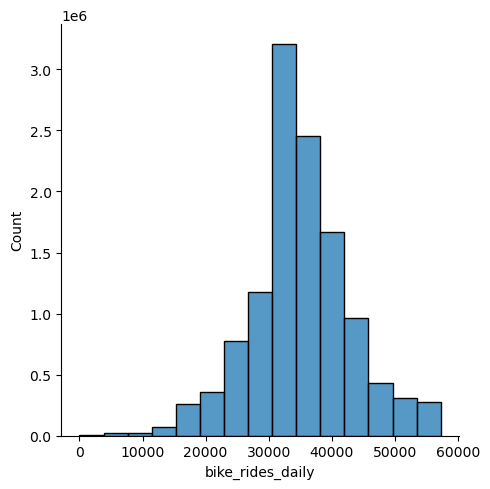

In [56]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [57]:
sns.set_style('whitegrid')

<Figure size 900x500 with 0 Axes>

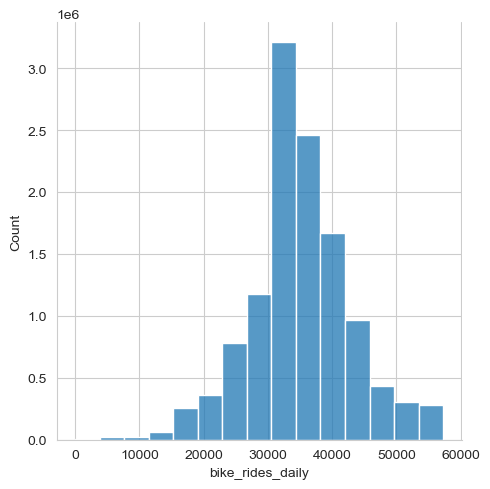

In [58]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [59]:
sns.set_style('dark')

<Figure size 900x500 with 0 Axes>

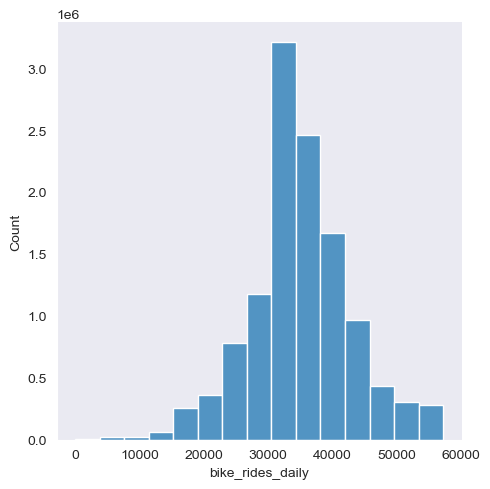

In [60]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [61]:
sns.set_style('white')

<Figure size 900x500 with 0 Axes>

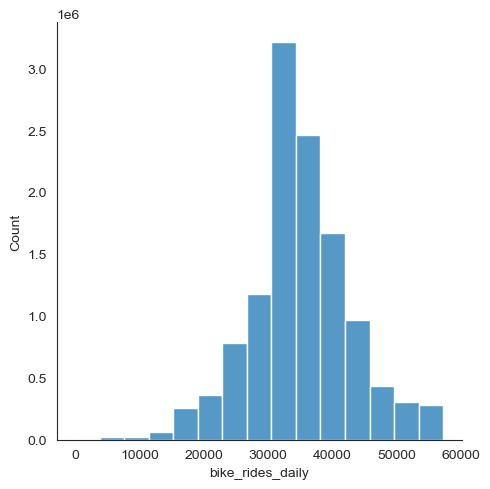

In [62]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [63]:
sns.set_style('ticks')

<Figure size 900x500 with 0 Axes>

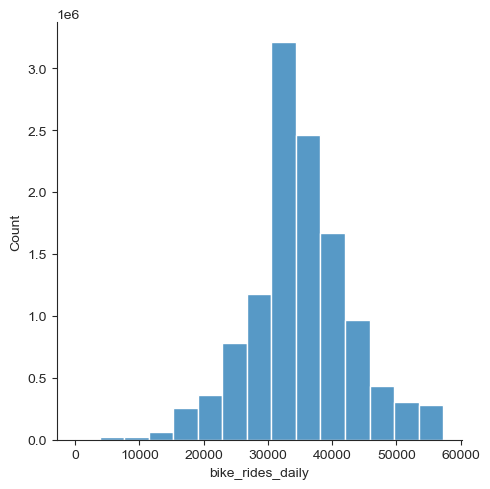

In [64]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [65]:
sns.set_theme()

<Figure size 900x500 with 0 Axes>

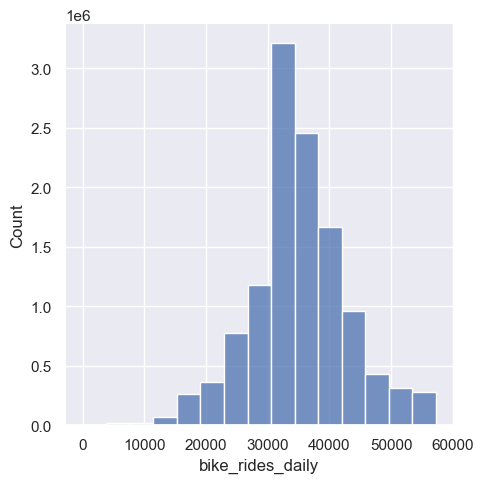

In [66]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

In [67]:
sns.set_theme(style="whitegrid", palette="Blues_r")

In [68]:
# Creating new column as trip_duration
# Ensure 'started_at' and 'ended_at' are in datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Display the first few rows to verify
print(df[['ride_id', 'trip_duration']].head())


            ride_id  trip_duration
0  34BD74D84D320CF5  687646.693117
1  FA436228F4CD7647  779090.164883
2  8AFBCFEE21703C2D  449302.609617
3  BA13AC6CD2C65E88  613827.890983
4  2F298092D779509A  263605.691983


In [69]:
df['trip_duration'].head()

0    687646.693117
1    779090.164883
2    449302.609617
3    613827.890983
4    263605.691983
Name: trip_duration, dtype: float64

### Palettes

In [71]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

<Figure size 900x500 with 0 Axes>

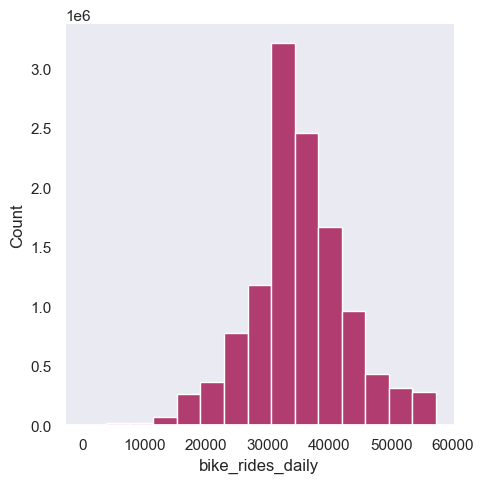

In [72]:
plt.figure(figsize=(9,5))
sns.displot(df['bike_rides_daily'], bins = 15)
plt.show()

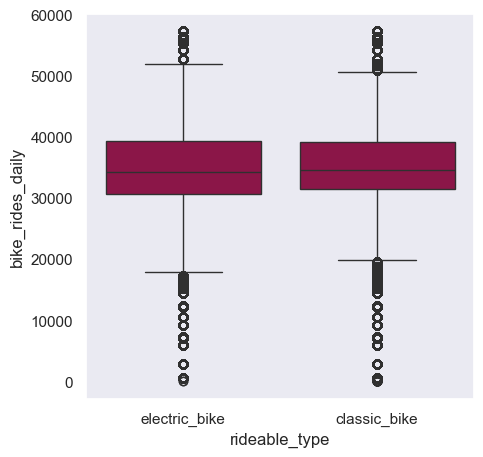

In [73]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'rideable_type', y = 'bike_rides_daily', data = df)
plt.show()

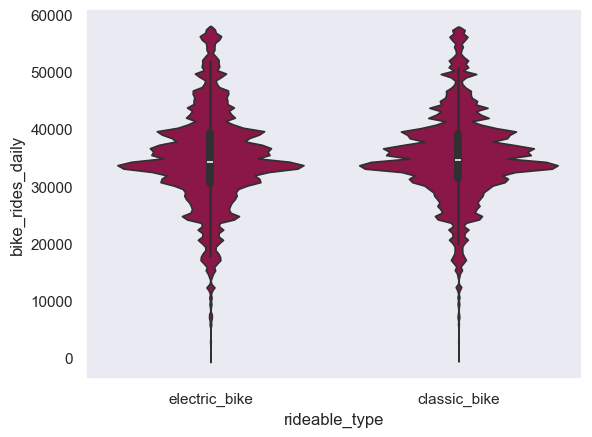

In [74]:
sns.violinplot(x = 'rideable_type', y = 'bike_rides_daily', data = df)
plt.show()

In [75]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag', 'trip_duration'],
      dtype='object')

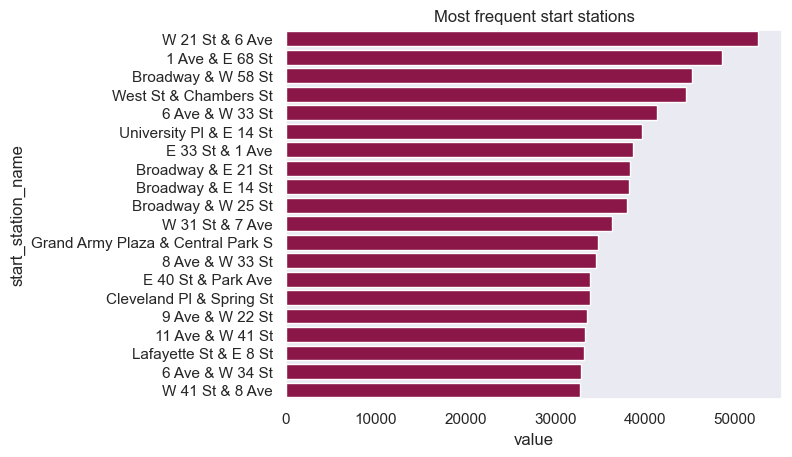

In [76]:
sns.set_palette('PuRd_r')
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

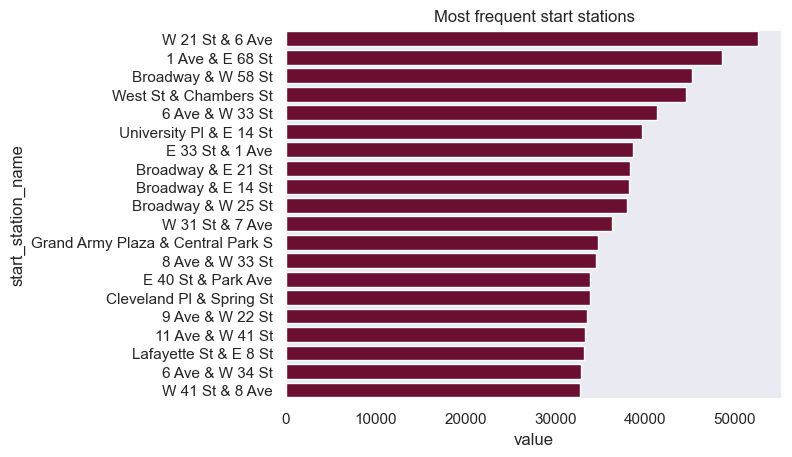

In [77]:
sns.set_palette('PuRd_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

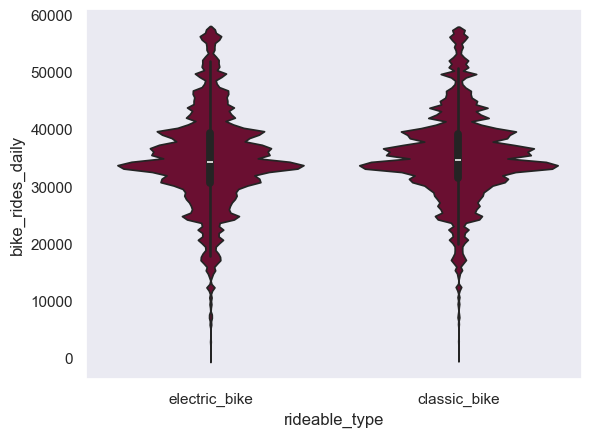

In [78]:
sns.violinplot(x = 'rideable_type', y = 'bike_rides_daily', data = df)
plt.show()

In [79]:
plt.figure(figsize = (10, 5))
with sns.color_palette('PuRd_r', n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name').set_title("Most frequent start stations")

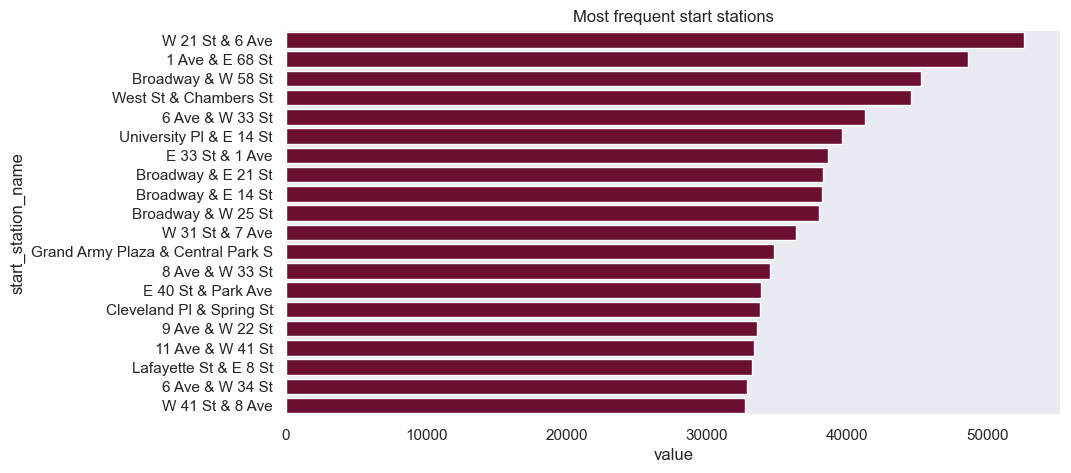

In [80]:
plt.show()

### Themes

In [82]:
# Ensure trip_duration is numerical
df['trip_duration'] = df['trip_duration'].astype(float)

In [83]:
df['trip_duration'].describe().apply(lambda x: format(x, 'f'))

count    12000000.000000
mean           19.366235
std           542.820553
min           -57.130933
25%             5.674617
50%             9.881425
75%            17.434783
max        779090.164883
Name: trip_duration, dtype: object

In [84]:
df_1 = df[df['trip_duration'] < 5000]

In [85]:
print(df.shape)
print(df_1.shape)

(12000000, 20)
(11999552, 20)


In [86]:
sns.set_theme(style = "white", palette = "bright")

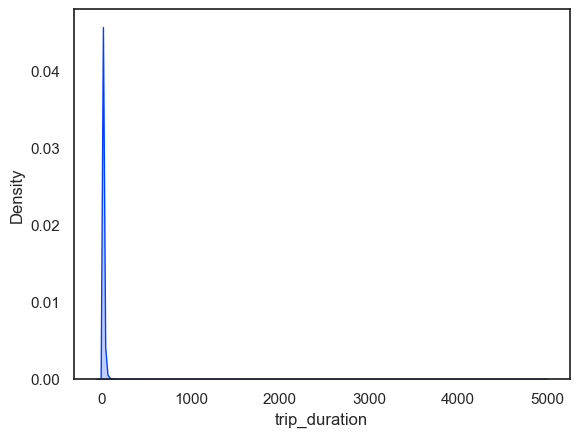

In [87]:
sns.kdeplot(df_1['trip_duration'], fill = True)
plt.show()

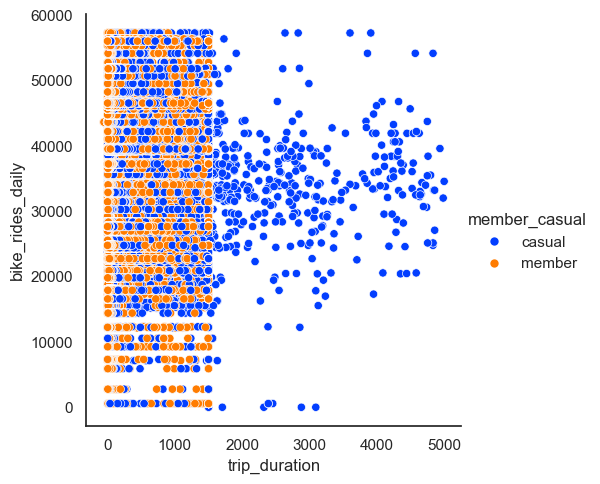

In [88]:
sns.relplot(data = df_1, x = 'trip_duration', y = 'bike_rides_daily', hue = 'member_casual')
plt.show()

In [89]:
df.to_csv('Data/output/newyork_data.csv')